w[0]: 0.393906  b: -0.031804


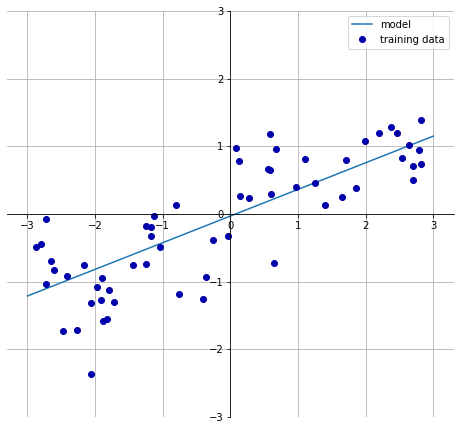

In [3]:
#선형회귀(최소제곱법)
import mglearn
X,y=mglearn.datasets.make_wave(n_samples=60)
mglearn.plots.plot_linear_regression_wave()
#특성이 한개이므로 w도 1개

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
lr=LinearRegression().fit(X_train,y_train) #매개변수가 없기 때문에 그냥 LinearRegression() 임
print("lr.coef_ : ",lr.coef_)#가중치w
print("lr.intercept_ : ",lr.intercept_) #편향b
#sklearn은 훈련 데이터를 통해 유도된 속성은 뒤에 _붙임

lr.coef_ :  [0.39390555]
lr.intercept_ :  -0.031804343026759746


In [5]:
print("훈련세트 점수 : {:.2f}".format(lr.score(X_train,y_train)))
print("테스트세트 점수 : {:.2f}".format(lr.score(X_test,y_test)))
#R^2값

훈련세트 점수 : 0.67
테스트세트 점수 : 0.66


In [6]:
#Boston LinearRegression
X,y=mglearn.datasets.load_extended_boston()
print("X.shape :",X.shape)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
lr=LinearRegression().fit(X_train,y_train)
print("lr.coef_ : ",lr.coef_) #가중치 104개->104개의 특성들을 각각 얼마나 가중할 것인가
print("lr.intercept_ : ",lr.intercept_)
print("훈련세트 점수 : {:.2f}".format(lr.score(X_train,y_train)))
print("테스트세트 점수 : {:.2f}".format(lr.score(X_test,y_test)))
#훈련세트 스코어 높고 테스트세트 스코어 낮으므로 모델복잡도 높고 과대적합이다.-> 그 의미는 가중치 값이 높아서 특성이 관여하는 정도가 컸고 과대적합이 일어났다.

X.shape : (506, 104)
lr.coef_ :  [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -1.75331865e+01  4.10103

In [7]:
#리지회귀
from sklearn.linear_model import Ridge
ridge=Ridge().fit(X_train,y_train)
print("alpha=1/훈련세트 점수 : {:.2f}".format(ridge.score(X_train,y_train)))
print("alpha=1/테스트세트 점수 : {:.2f}".format(ridge.score(X_test,y_test)))
#가중치를 0에 가깝에 함으로써 특성이 예측에 미치는 영향 최소화->과대적합 낮아짐->모델 복잡도 낮아짐->훈련세트와 테스트세트 점수 차 감소
print("\n")
ridge10=Ridge(alpha=10).fit(X_train,y_train)
print("alpha=10/훈련세트 점수 : {:.2f}".format(ridge10.score(X_train,y_train)))
print("alpha=10/테스트세트 점수 : {:.2f}".format(ridge10.score(X_test,y_test)))
print("\n")
ridge01=Ridge(alpha=0.1).fit(X_train,y_train)
print("alpha=0.1/훈련세트 점수 : {:.2f}".format(ridge01.score(X_train,y_train)))
print("alpha=0.1/테스트세트 점수 : {:.2f}".format(ridge01.score(X_test,y_test)))
#alpha가 증가할 수록 가중치 0에 가까워짐->과대적합 더 낮아짐
#따라서 alpha가 0.1일때 더 최적에 가깝다.

alpha=1/훈련세트 점수 : 0.89
alpha=1/테스트세트 점수 : 0.75


alpha=10/훈련세트 점수 : 0.79
alpha=10/테스트세트 점수 : 0.64


alpha=0.1/훈련세트 점수 : 0.93
alpha=0.1/테스트세트 점수 : 0.77


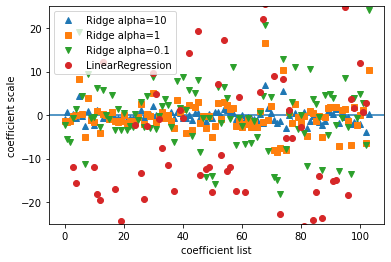

In [8]:
import matplotlib.pyplot as plt
plt.plot(ridge10.coef_,'^',label='Ridge alpha=10')
plt.plot(ridge.coef_,'s',label='Ridge alpha=1')
plt.plot(ridge01.coef_,'v',label='Ridge alpha=0.1')
plt.plot(lr.coef_,'o',label='LinearRegression')
plt.ylabel("coefficient scale")
plt.xlabel("coefficient list") #특성 목록
xlims=plt.xlim() #x축의 최소값 최대값 [min,max]
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend(loc='best')
#선형회귀의 가중치는 0에서 가장 멀고 alpha가 가장 큰 ridge10의 가중치는 0에 가장 가깝다

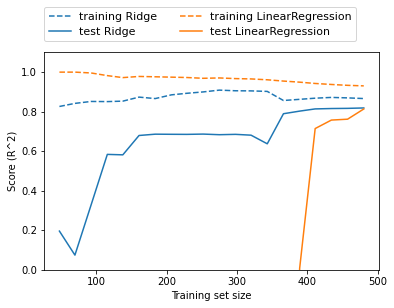

In [9]:
#학습곡선 : follows size of dataset
mglearn.plots.plot_ridge_n_samples()

In [10]:
from sklearn.linear_model import Lasso
import numpy as np
lasso=Lasso().fit(X_train,y_train) #ridge와 같이 규제 심지어 가중치가 0이 되기도함
print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test,y_test)))
print("사용한 특성의 개수 : {}".format(np.sum(lasso.coef_!=0)))
#L1은 L2적합보다 규제를 강화할 수록 과소적합해 지는데 L1인 Lasso의 alpha가 1일때 L2인 Ridge 보다 점수가 낮은걸 보니 과소적합이다.

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 개수 : 4


In [11]:
lasso001=Lasso(alpha=0.01,max_iter=50000).fit(X_train,y_train) #alpha를 줄이면 가장 낮은 오차 찾아가는 반복 횟수 증가->max_iter증가시켜야함
print("훈련 세트 점수 : {:.2f}".format(lasso001.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test,y_test)))
print("사용한 특성의 개수 : {}".format(np.sum(lasso001.coef_!=0))) #alpha를 줄이니 사용한 특성개수 증가

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 개수 : 33


In [12]:
lasso00001=Lasso(alpha=0.0001,max_iter=50000).fit(X_train,y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso00001.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso00001.score(X_test,y_test)))
print("사용한 특성의 개수 : {}".format(np.sum(lasso00001.coef_!=0)))
#alpha값을 너무 낮추니 과대적합이 되고 LinearRegression와 비슷

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용한 특성의 개수 : 96


Text(0, 0.5, 'coef')

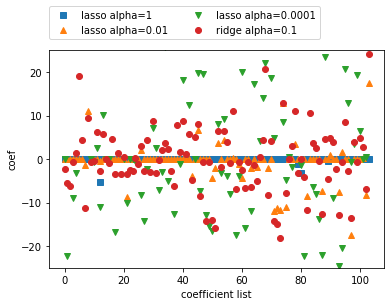

In [13]:
plt.plot(lasso.coef_,'s',label='lasso alpha=1')
plt.plot(lasso001.coef_,'^',label='lasso alpha=0.01')
plt.plot(lasso00001.coef_,'v',label='lasso alpha=0.0001')
plt.plot(ridge01.coef_,'o',label='ridge alpha=0.1')
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("coefficient list")
plt.ylabel("coef")

C:\Users\sewoong\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


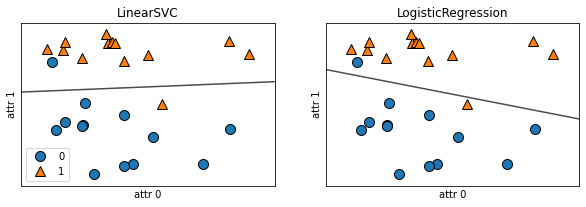

In [14]:
#선형분류 linear_model.LogisticRegression & svm.LinearSVC (support vector classifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X,y=mglearn.datasets.make_forge()
fig ,axes=plt.subplots(1,2,figsize=(10,3))
for model,ax in zip([LinearSVC(max_iter=10000),LogisticRegression()],axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('attr 0')
    ax.set_ylabel('attr 1')
axes[0].legend(loc='best')

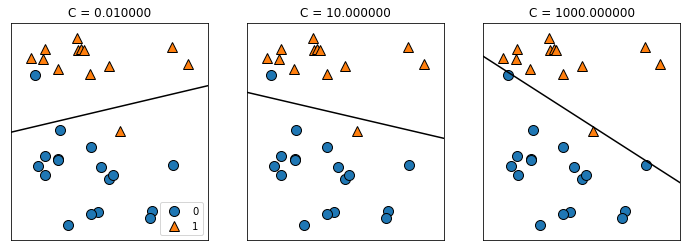

In [15]:
mglearn.plots.plot_linear_svc_regularization()
#C와 규제는 반비례이므로 ax가 오른쪽으로 갈수록 규제가 작아지고 과대적합이된다.

In [16]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42) #stratify : class비율따져서 한쪽으로 쏠리지 않게
logreg=LogisticRegression(max_iter=5000).fit(X_train,y_train)
print('훈련 세트 점수  : {:.2f}'.format(logreg.score(X_train,y_train)))
print('테스트 세트 점수 : {:.2f}'.format(logreg.score(X_test,y_test)))
#점수가 둘다 잘 나왔지만 훈련과 테스트의 점수가 비슷하므로 과소적합

훈련 세트 점수  : 0.96
테스트 세트 점수 : 0.96


In [17]:
#과소적합이므로 규제를 내려야함. C를 올려
logreg100=LogisticRegression(max_iter=5000,C=100).fit(X_train,y_train)
print('훈련 세트 점수  : {:.2f}'.format(logreg100.score(X_train,y_train)))
print('테스트 세트 점수 : {:.2f}'.format(logreg100.score(X_test,y_test)))

훈련 세트 점수  : 0.98
테스트 세트 점수 : 0.97


In [18]:
logreg001=LogisticRegression(C=0.01,max_iter=5000).fit(X_train,y_train)
print('훈련 세트 점수  : {:.2f}'.format(logreg001.score(X_train,y_train)))
print('테스트 세트 점수 : {:.2f}'.format(logreg001.score(X_test,y_test)))
#C가1일때보다 성능 나빠짐 과소적합

훈련 세트 점수  : 0.95
테스트 세트 점수 : 0.95


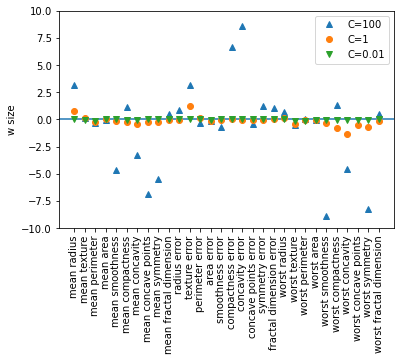

In [19]:
plt.plot(logreg100.coef_.T,'^',label='C=100')
plt.plot(logreg.coef_.T,'o',label='C=1')
plt.plot(logreg001.coef_.T,'v',label='C=0.01')
plt.ylim(-10,10)
xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90) #tick에 문자열 넣는 법 -> tick range+문자열 리스트
plt.ylabel('w size')
plt.legend(loc='best')

C값에 따라 가중치가 양수 음수가 바뀐다? : 양성 악성의 신호가 모두 될 수 있다 -> 계수 항상 의심하기
C가 아무리 바뀌어도 가중치가 항상 음이나 양이다? : 악성 또는 양성의 신호와 강한 상관 관계

LogisticRegression은 기본적으로 L2 규제 -> 이해 쉬운 모델 원한다면 L1규제로 바꿔

C=0.001 인 l1 로지스틱 회귀 훈련 정확도 : 0.91
C=0.001 인 l1 로지스틱 회귀 테스트 정확도 : 0.92
C=1.000 인 l1 로지스틱 회귀 훈련 정확도 : 0.96
C=1.000 인 l1 로지스틱 회귀 테스트 정확도 : 0.96
C=100.000 인 l1 로지스틱 회귀 훈련 정확도 : 0.99
C=100.000 인 l1 로지스틱 회귀 테스트 정확도 : 0.98


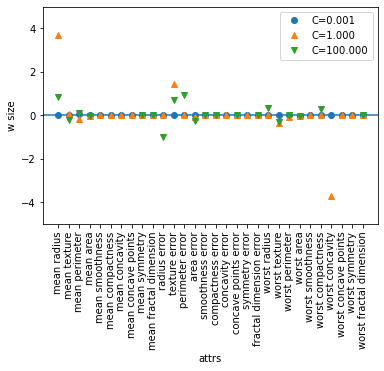

In [20]:
for C,marker in zip([0.001,1,100],['o','^','v']):
    lr_l1=LogisticRegression(C=C,max_iter=1000,penalty='l1',solver='liblinear').fit(X_train,y_train) #solver를 바꾸는 이유 : L1 사용 위해
    print('C={:.3f} 인 l1 로지스틱 회귀 훈련 정확도 : {:.2f}'.format(C,lr_l1.score(X_train,y_train)))
    print('C={:.3f} 인 l1 로지스틱 회귀 테스트 정확도 : {:.2f}'.format(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T,marker,label='C={:.3f}'.format(C))
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.ylim(-5,5)
xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.xlabel('attrs')
plt.ylabel('w size')
plt.legend(loc='best')
#규제를 L1으로 바꾸니까 계수가 0이 되는게 생김

다중 클래스 선형 분류

(100, 2)
[0 1 2]


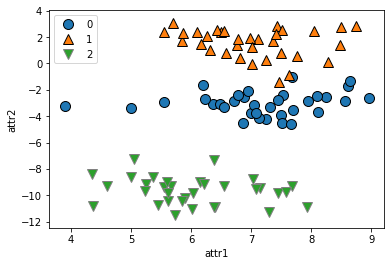

In [21]:
from sklearn.datasets import make_blobs
X,y=make_blobs()
print(X.shape)
print(np.unique(y)) #3 classes
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('attr1')
plt.ylabel('attr2')
plt.legend(loc='best')

In [22]:
linear_svm=LinearSVC(max_iter=5000).fit(X,y)
print('계수 배열의 크기 : ',linear_svm.coef_.shape)
print('절편 배열의 크기 : ',linear_svm.intercept_.shape)
#(3,2) -> 3은 3개의 클래스 2는 2개의 특성

계수 배열의 크기 :  (3, 2)
절편 배열의 크기 :  (3,)


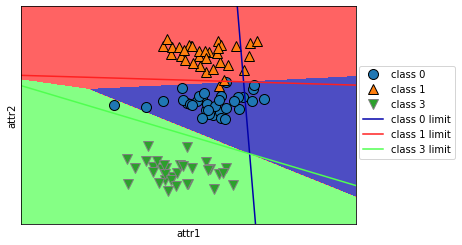

In [23]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15) #shape=(50,)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],color=color) #w1x1 + w2x2 + b -> x2 = - (w1x1 + b) / w2
plt.xlabel('attr1')
plt.ylabel('attr2')
plt.legend(['class 0','class 1','class 3','class 0 limit','class 1 limit','class 3 limit'],loc=(1.01,0.3))

linear(when dataset size is big) - RogisticRegreesion, Ridge -> solver ='sag'
                                 - SGDClassifier, SGDRegressor

Naive bayes classifier : treat feature individually -> [ GaussianNB, BernoulliNB, MultinomialNB ]
                                                        continuous          discrete

In [24]:
#BernoulliNB
X=np.array([[0,1,0,1],
           [1,0,1,1],
           [0,0,0,1],
           [1,0,1,0]])
y=np.array([0,1,0,1])
counts={}
for label in np.unique(y):
    counts[label]=X[y==label].sum(axis=0)
print('특성카운트 : {}'.format(counts))

특성카운트 : {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}
